# Draft

* I will aim for 15-20 questions for my analysis
* The main goal is to analyze how difficulty, course rating and reviews are correlated
* Use plotly express, more fancy stuff if needed
* Use AI to guide me through the exercise as a tutor
* At the end, make sure you incorporated feedback from the last sprint project

Notes: Plotly express, boxplots

Main goal: identify opportunities for new data science courses: areas where there's high demand but limited supply.


> Typically you need to complete several courses/moduls under “Specializations” category. These courses are designed for a specific subject in mind, e.g. data analysis.

Questions:


-   What are the top 10 most enrolled courses, and what subjects do they cover?
-   Which subject areas have the highest average enrollment but the fewest course offerings?
-   Are there any difficulty levels (Beginner, Intermediate, Advanced) that are underrepresented in popular subject areas?
-   Which specializations have the highest enrollment-to-course ratio, potentially indicating demand for more courses in that area?
-   Are there any high-rated courses with relatively low enrollment, suggesting potential for growth with better marketing?
-   Which languages, other than English, show high demand but have limited course offerings?
-   Are there any gaps in the difficulty progression (Beginner to Advanced) within popular subject areas?
-   What subject areas have the highest ratings but fewer course options compared to other subjects?
-   Which organizations have the highest-rated courses, and are there subject areas they're not covering?
-   What is the distribution of course types (individual courses, specializations, professional certificates) across different subjects, and are there imbalances?
-   What topics are covered in the courses with the highest enrollment-to-rating ratio?
-   Are there any subject areas with high enrollment but lower average ratings, indicating a need for improved course quality?
-   Are there any interdisciplinary topics that are currently underrepresented in the course catalog?

- Conclusions


In [2]:
import pandas as pd
from pytrends.request import TrendReq

pytrend = TrendReq()
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from helpers import strip_spaces, lowercase_data, convert_metric_prefix_to_numeric

df = pd.read_csv("coursera_data.csv", index_col=0)

df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


## Let's clean the data and prepare it for analysis

In [3]:
df = lowercase_data(df)
df = strip_spaces(df)

# Convert numeric values from e.g. '48k' to '48000' whole numbers for `course_students_enrolled`
df['course_students_enrolled'] = convert_metric_prefix_to_numeric(df['course_students_enrolled'])
df.head()

,course_title,course_organization,course_certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(isc)² systems security certified practitioner...,(isc)²,specialization,4.7,beginner,5300.0
743,a crash course in causality: inferring causal...,university of pennsylvania,course,4.7,intermediate,17000.0
874,a crash course in data science,johns hopkins university,course,4.5,mixed,130000.0
413,a law student's toolkit,yale university,course,4.7,mixed,91000.0
635,a life of happiness and fulfillment,indian school of business,course,4.8,mixed,320000.0


In [4]:
missing_values = pd.Series(df.isnull().sum(), name="Missing Values")
missing_values

course_title                0
course_organization         0
course_certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
Name: Missing Values, dtype: int64

In [5]:
duplicate_values = pd.Series(df.duplicated().sum(), name="Duplicate Values")
duplicate_values

0    0
Name: Duplicate Values, dtype: int64

In [6]:
# Name index column to 'id' for clarity
df = df.reset_index().rename(columns={'index': 'id'}).set_index('id')

We see that there no duplicate or no missing values, so we won't be handling them. Other data looks OK.

# Now, let's try to find any gaps in the market by answering the questions below

### What are the top 10 most enrolled courses, and what subjects do they cover?

In [7]:
top_10_enrolled_courses = df[['course_title', 'course_students_enrolled']].nlargest(10, 'course_students_enrolled')
top_10_enrolled_courses


,course_title,course_students_enrolled
id,,
6,machine learning,3200000.0
2,the science of well-being,2500000.0
3,python for everybody,1500000.0
47,programming for everybody (getting started wit...,1300000.0
13,data science,830000.0
44,career success,790000.0
175,english for career development,760000.0
40,successful negotiation: essential strategies a...,750000.0
15,data science: foundations using r,740000.0


We see broad categories
- Data Science (AI, Machine Learning, deep learning)
- Programming
- Career
- Business

### Which subject areas have the highest average enrollment but the fewest course offerings?

In [8]:
# TODO change calculation
subject_areas = pd.Series(df.groupby('course_organization')['course_students_enrolled'].mean().nlargest(10))
subject_areas

course_organization
stanford university                             303375.000000
yale university                                 232470.588235
mcmaster university                             230000.000000
google - spectrum sharing                       210000.000000
ludwig-maximilians-universität münchen (lmu)    192500.000000
école polytechnique                             190000.000000
university of michigan                          181407.317073
georgia institute of technology                 181300.000000
deeplearning.ai                                 178962.500000
university of washington                        167400.000000
Name: course_students_enrolled, dtype: float64

### Are there any difficulty levels (Beginner, Intermediate, Advanced) that are underrepresented in popular subject areas?

In [9]:
difficulty_levels = pd.Series(
    df.groupby('course_difficulty')['course_students_enrolled'].sum().astype(int).nlargest(10))
difficulty_levels

course_difficulty
beginner        39921800
mixed           24989400
intermediate    14506300
advanced         1264400
Name: course_students_enrolled, dtype: int64

### Which specializations have the highest enrollment-to-course ratio, potentially indicating demand for more courses in that area?

### What are the emerging trends in course topics based on recent additions to the catalog?

In [10]:
recent_courses = df.sort_values('course_title', ascending=False).head(10)
recent_courses

,course_title,course_organization,course_certificate_type,course_rating,course_difficulty,course_students_enrolled
id,,,,,,
163,финансовые инструменты для частного инвестора,national research university higher school of ...,specialization,4.7,beginner,38000.0
875,русский как иностранный,saint petersburg state university,specialization,4.6,intermediate,9800.0
545,разработка интерфейсов: вёрстка и javascript,e-learning development fund,specialization,4.5,intermediate,30000.0
883,психолингвистика (psycholinguistics),saint petersburg state university,course,4.8,mixed,21000.0
236,программирование на python,mail.ru group,specialization,4.5,intermediate,52000.0
889,погружение в python,moscow institute of physics and technology,course,4.7,intermediate,45000.0
841,основы разработки на c++: белый пояс,e-learning development fund,course,4.9,intermediate,41000.0
703,основы программирования на python,national research university higher school of ...,course,4.6,beginner,83000.0
405,основы digital маркетинга,national research university higher school of ...,specialization,4.5,intermediate,19000.0


### Are there any high-rated courses with relatively low enrollment, suggesting potential for growth with better marketing?

### Which languages, other than English, show high demand but have limited course offerings?

### Are there any gaps in the difficulty progression (Beginner to Advanced) within popular subject areas?

### What subject areas have the highest ratings but fewer course options compared to other subjects?

### Are there any in-demand skills or technologies that are underrepresented in the current course offerings?

### Which organizations have the highest-rated courses, and are there subject areas they're not covering?

### What is the distribution of course types (individual courses, specializations, professional certificates) across different subjects, and are there imbalances?

### Are there any correlations between course characteristics (e.g., duration, difficulty) and enrollment that could inform new course design?

### What topics are covered in the courses with the highest enrollment-to-rating ratio?

### Are there any subject areas with high enrollment but lower average ratings, indicating a need for improved course quality?

### What are the most common prerequisites for advanced courses, and are there gaps in preparing students for these?

### Are there any successful course formats or structures that could be applied to other subject areas?

### What is the distribution of course durations, and is there a sweet spot that could inform new course development?

### Are there any interdisciplinary topics that are currently underrepresented in the course catalog?

In [11]:
underrepresented_topics = df['course_title'].str.split().explode().value_counts().head(10)
underrepresented_topics

course_title
and             222
to              111
for             107
the              90
introduction     75
of               73
data             69
with             64
in               64
management       46
Name: count, dtype: int64

# A glimpse into the present from the past (Google Analytics trends)

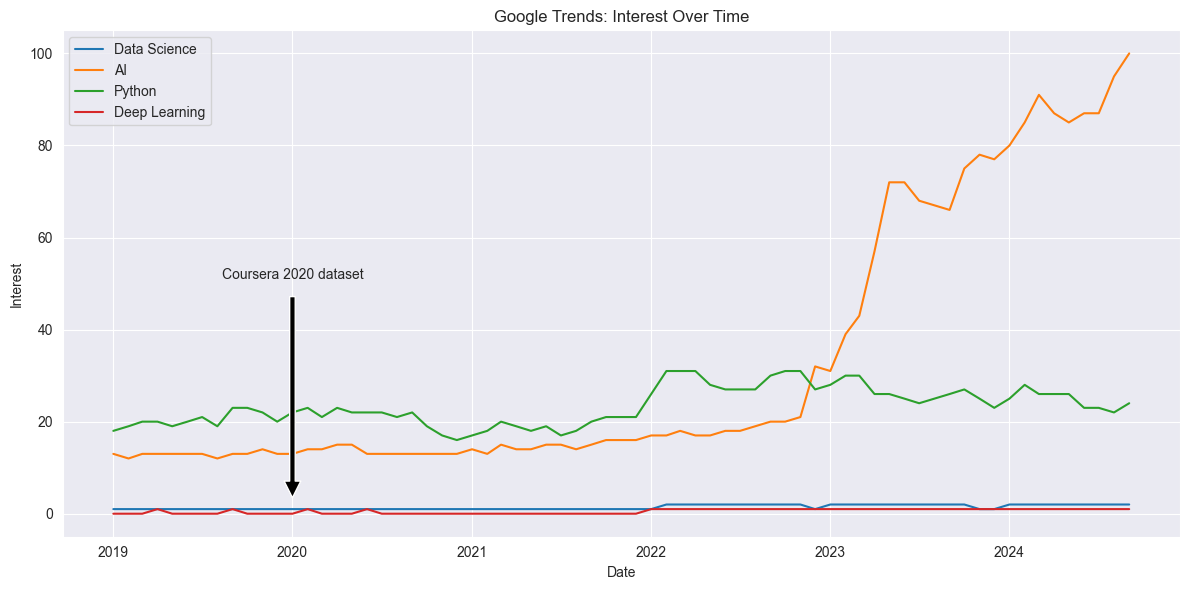

In [23]:
pytrends = TrendReq(hl='en-US', tz=360)

keywords = ["Data Science", "AI", "Python", "Deep Learning"]
timeframe = '2019-01-01 2024-09-30'

pytrends.build_payload(keywords, cat=0, timeframe=timeframe, geo='', gprop='')

data = pytrends.interest_over_time()

plt.figure(figsize=(12, 6))
for column in data.columns:
    if column != 'isPartial':
        plt.plot(data.index, data[column], label=column)

# Add annotation for Coursera 2020 dataset
coursera_date = pd.to_datetime('2020-01-01')
y_position = data.loc[coursera_date, 'Data Science']  # Using 'Data Science' interest as y-position
plt.annotate('Coursera 2020 dataset',
             xy=(coursera_date, y_position),
             xytext=(coursera_date, y_position + 50),
             arrowprops=dict(facecolor='black', shrink=-0.05),
             horizontalalignment='center')

plt.title("Google Trends: Interest Over Time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()